# ②相互情報量の計算

<pre>
sklearn.metrics.normalized_mutual_info_score(labels_true,labels_pred,*,average_method=arithmetic')
2つのクラスタリング間の正規化相互情報。
正規化相互情報量(NMI)は、相互情報量(MI)スコアを正規化し、結果を0(相互情報なし)と1(完全な相関)の間でスケーリングする。
</pre>

<img src="NMI.jpg">

In [1]:
from sklearn import datasets
from sklearn import cluster

blobs, ground_truth = datasets.make_blobs(1000, centers=3,cluster_std=1.75)

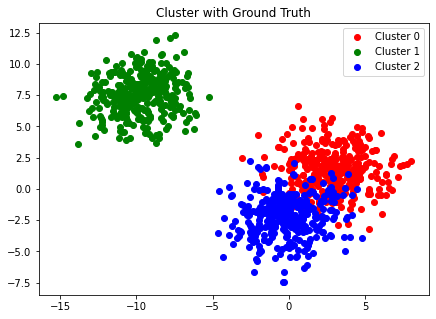

In [11]:
from sklearn import datasets
from sklearn import cluster

%matplotlib inline
import matplotlib.pyplot as plt
 
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
     p = blobs[ground_truth == i]
     ax.scatter(p[:,0], p[:,1], c=colors[i],
     label="Cluster {}".format(i))
ax.set_title("Cluster with Ground Truth")
ax.legend()

In [3]:
print(ground_truth)

[2 0 1 1 2 2 0 0 2 2 1 2 0 1 2 0 2 0 0 0 1 2 2 0 1 2 2 0 2 2 0 0 0 0 2 1 0
 2 0 2 0 2 1 0 1 1 0 0 1 0 2 0 0 2 2 1 2 1 0 2 0 1 1 1 0 0 0 0 2 1 0 1 1 1
 1 1 1 2 2 0 1 1 2 2 0 2 2 2 0 0 0 1 2 2 1 0 1 2 1 0 2 1 0 2 2 2 0 2 1 0 1
 0 0 2 1 1 2 1 0 1 0 0 1 0 2 0 2 2 1 1 2 1 2 2 2 2 1 0 1 0 2 0 0 1 2 2 2 1
 1 2 0 0 1 0 0 2 0 0 2 2 0 0 1 1 1 0 0 1 0 2 0 0 1 0 0 0 1 0 0 0 1 1 1 1 2
 0 0 1 0 1 2 2 0 0 1 0 1 1 2 0 1 1 0 1 1 2 0 0 0 2 2 0 2 2 0 1 2 2 2 1 1 0
 2 0 1 1 2 2 0 1 0 1 2 2 1 2 0 1 1 1 0 0 1 2 0 1 2 0 1 0 0 1 2 0 0 2 2 2 2
 1 0 2 1 2 2 1 1 0 0 1 2 0 0 1 1 0 2 1 1 1 1 1 1 2 0 2 1 1 2 2 0 0 1 1 1 0
 2 1 0 2 2 0 2 2 1 2 1 0 2 0 1 1 2 1 1 1 0 2 2 2 0 0 1 1 0 1 0 1 0 1 2 1 1
 0 2 1 1 1 1 2 1 1 2 0 1 2 0 2 1 0 2 2 1 2 0 2 0 0 1 0 1 0 2 2 2 2 1 1 2 1
 1 0 0 2 0 1 1 2 1 1 0 2 0 0 0 0 1 1 0 0 0 0 1 1 1 2 2 2 0 0 0 2 1 2 0 2 0
 1 0 0 1 1 2 0 0 2 2 0 1 1 1 2 2 2 2 0 2 2 2 2 1 1 1 0 1 1 2 2 2 1 2 0 1 2
 0 1 0 2 0 1 0 0 2 1 1 0 2 2 1 0 2 2 1 0 1 2 2 2 0 1 1 0 2 2 1 1 1 2 0 1 2
 1 1 1 0 0 1 0 1 2 0 0 2 

In [4]:
print(blobs)

[[  0.11945484  -3.07033807]
 [  2.79508608   0.80768714]
 [-11.01137476   6.12801444]
 ...
 [  3.49423504   0.59915045]
 [  3.62378773   2.17763346]
 [  0.99907157  -4.29443685]]


In [5]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(n_clusters=3)

In [6]:
kmeans.cluster_centers_

array([[-9.73332095,  7.57081909],
       [ 3.04758557,  1.54279708],
       [-0.33315241, -2.26470283]])

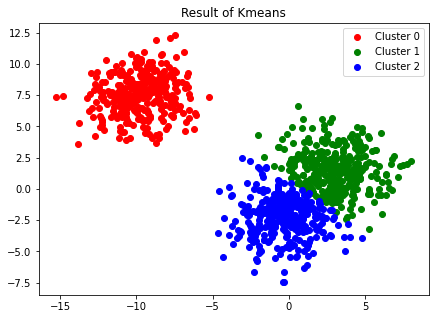

In [12]:
f, ax = plt.subplots(figsize=(7, 5))
colors = ['r', 'g', 'b']
for i in range(3):
     p = blobs[kmeans.labels_ == i]
     ax.scatter(p[:,0], p[:,1], c=colors[i],
     label="Cluster {}".format(i))
ax.set_title("Result of Kmeans")
ax.legend()

In [8]:
print(kmeans.labels_)

[2 1 0 0 2 2 1 1 2 2 0 1 1 0 2 1 2 1 1 1 0 2 2 1 0 2 2 1 2 2 1 1 1 2 1 0 2
 2 1 2 1 2 0 1 0 0 2 1 0 1 2 2 1 2 1 0 2 0 1 2 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 2 2 1 0 0 2 2 1 2 2 2 1 1 1 0 2 2 0 1 0 2 0 1 2 0 1 2 2 2 1 2 0 1 0
 1 1 2 0 0 2 0 1 0 1 1 0 2 2 1 2 2 0 0 2 0 2 2 2 2 0 1 0 1 2 1 1 0 2 2 2 0
 0 2 1 1 0 1 1 1 1 2 2 2 1 1 0 0 0 1 1 0 1 2 1 1 0 1 1 1 0 1 1 2 0 0 0 0 2
 1 1 0 1 0 2 2 1 1 0 1 0 0 2 1 0 0 1 0 0 2 1 1 1 2 2 1 2 2 1 0 2 2 2 0 0 1
 1 1 0 0 1 2 1 0 1 0 2 2 0 2 1 0 0 0 1 1 0 2 1 0 2 1 0 1 1 0 2 1 1 2 1 1 2
 0 1 1 0 2 2 0 0 1 1 0 2 1 2 0 0 1 2 0 0 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 0 1
 2 0 1 2 2 1 2 2 0 1 0 1 1 1 0 0 1 0 0 0 1 2 2 2 1 1 0 0 1 0 2 0 1 0 2 0 0
 1 2 0 0 0 0 1 0 0 2 1 0 2 1 2 0 1 2 2 0 2 1 2 1 1 0 1 0 1 2 2 1 2 0 0 2 0
 0 1 1 1 2 0 0 2 0 0 1 2 2 1 1 1 0 0 1 1 1 1 0 0 0 2 2 2 1 1 1 2 0 2 1 2 1
 0 1 2 0 0 2 1 1 2 2 1 0 0 0 2 2 2 2 1 2 2 2 2 0 0 0 1 0 0 1 2 2 0 2 1 0 2
 1 0 1 2 1 0 1 2 2 0 0 1 2 2 0 1 2 2 0 1 0 2 2 2 1 0 0 1 2 2 0 0 0 2 1 0 2
 0 0 0 1 1 0 1 0 2 1 1 2 

In [9]:
from sklearn import metrics
metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_)

0.8081877989376224

<img src="compare.png">

<img src="compare.png">